9.2-9.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

In [9]:
R_etac = 850e+3
Vr = 7100
Tr = 40e-6
Kr = 0.5e+12
f0 = 5.3e+09

Fr = 24e+6 
Fa = 1700   #PRF
# delta_fdop = 1338
theta_sqc = 2*np.pi/180

Ta = 0.64

La = 10

In [10]:
Vs = Vr*1.06
Vg = Vr*0.94
theta_rc = np.arcsin(np.sin(theta_sqc)*Vr/Vg)
f_etac = 2*Vs*np.sin(theta_sqc)*f0/sc.c
theta_bw = 0.886*sc.c/f0/La
Naz = Ta*Fa
Nrg = Tr*Fr

delta_fdop = 2*Vs*np.cos(theta_rc)/sc.c*f0*theta_bw
print('f_etac:',f_etac)
print('delta_fdop:',delta_fdop)


R_0 = R_etac*np.cos(theta_rc)       #零多普勒面斜距
eta_c = -R_0*np.tan(theta_rc)/Vr
N_az = int(2*Naz)
N_rg = int(2*Nrg)

eta = np.linspace(-Ta, Ta - 1/Fa, N_az)
tau = np.linspace(-Tr, Tr - 1/Fr, N_rg) 
eta = eta.reshape(N_az,1)
tau = tau.reshape(1,N_rg)

eta_array = eta + eta_c

print('R_0:',R_0,'R_etac:',R_etac,'eta_c:',eta_c)
print(N_az,N_rg,f_etac,theta_rc*180/np.pi)

f_etac: 9286.852336825752
delta_fdop: 1332.6877453906957
R_0: 849413.9680575294 R_etac: 850000.0 eta_c: -4.444796553360177
2176 1920 9286.852336825752 2.1277165260781707


SPECAN deramp

Ka: 2094.034725998632


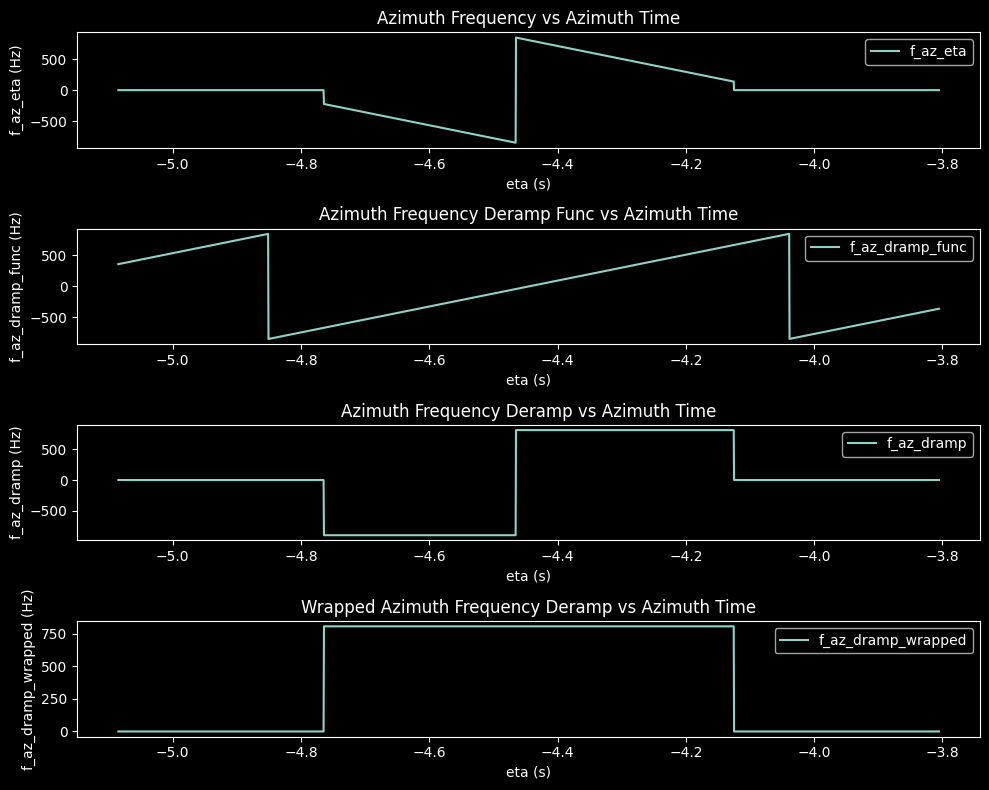

In [45]:
Ka = 2*Vr**2*np.cos(theta_rc)**3/(sc.c/f0*R_0)
print('Ka:',Ka)

f_az_eta = -Ka*eta_array*(np.abs(eta_array-eta_c)<=Ta/2)
f_az_eta_wrapped = f_az_eta % (Fa)
f_az_eta_wrapped[f_az_eta_wrapped > Fa/2] -= Fa
plt.figure(figsize=(10, 8))
plt.subplot(4,1,1)
plt.plot(eta_array[:,0], f_az_eta_wrapped[:,0]
           , label='f_az_eta')
plt.xlabel('eta (s)')
plt.ylabel('f_az_eta (Hz)')
plt.title('Azimuth Frequency vs Azimuth Time')
# plt.grid()
plt.legend()

plt.subplot(4,1,2)
f_az_dramp_func = Ka*(eta_array-eta_c)
f_az_dramp_func_wrapped = f_az_dramp_func % (Fa)
f_az_dramp_func_wrapped[f_az_dramp_func_wrapped > Fa/2] -= Fa
plt.plot(eta_array[:,0], f_az_dramp_func_wrapped[:,0]
           , label='f_az_dramp_func')
plt.xlabel('eta (s)')
plt.ylabel('f_az_dramp_func (Hz)')
plt.title('Azimuth Frequency Deramp Func vs Azimuth Time')
# plt.grid()
plt.legend()

plt.subplot(4,1,3)
f_az_dramp = (f_az_eta_wrapped+f_az_dramp_func_wrapped)*(np.abs(eta_array-eta_c)<=Ta/2)
plt.plot(eta_array[:,0], f_az_dramp[:,0]
           , label='f_az_dramp')
plt.xlabel('eta (s)')
plt.ylabel('f_az_dramp (Hz)')
plt.title('Azimuth Frequency Deramp vs Azimuth Time')
# plt.grid()
plt.legend()

plt.subplot(4,1,4)
f_az_dramp_wrapped = f_az_dramp % (Fa)
f_az_dramp_wrapped[f_az_dramp_wrapped > Fa/2] -= Fa
plt.plot(eta_array[:,0], f_az_dramp_wrapped[:,0]
           , label='f_az_dramp_wrapped')
plt.xlabel('eta (s)')
plt.ylabel('f_az_dramp_wrapped (Hz)')
plt.title('Wrapped Azimuth Frequency Deramp vs Azimuth Time')
# plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

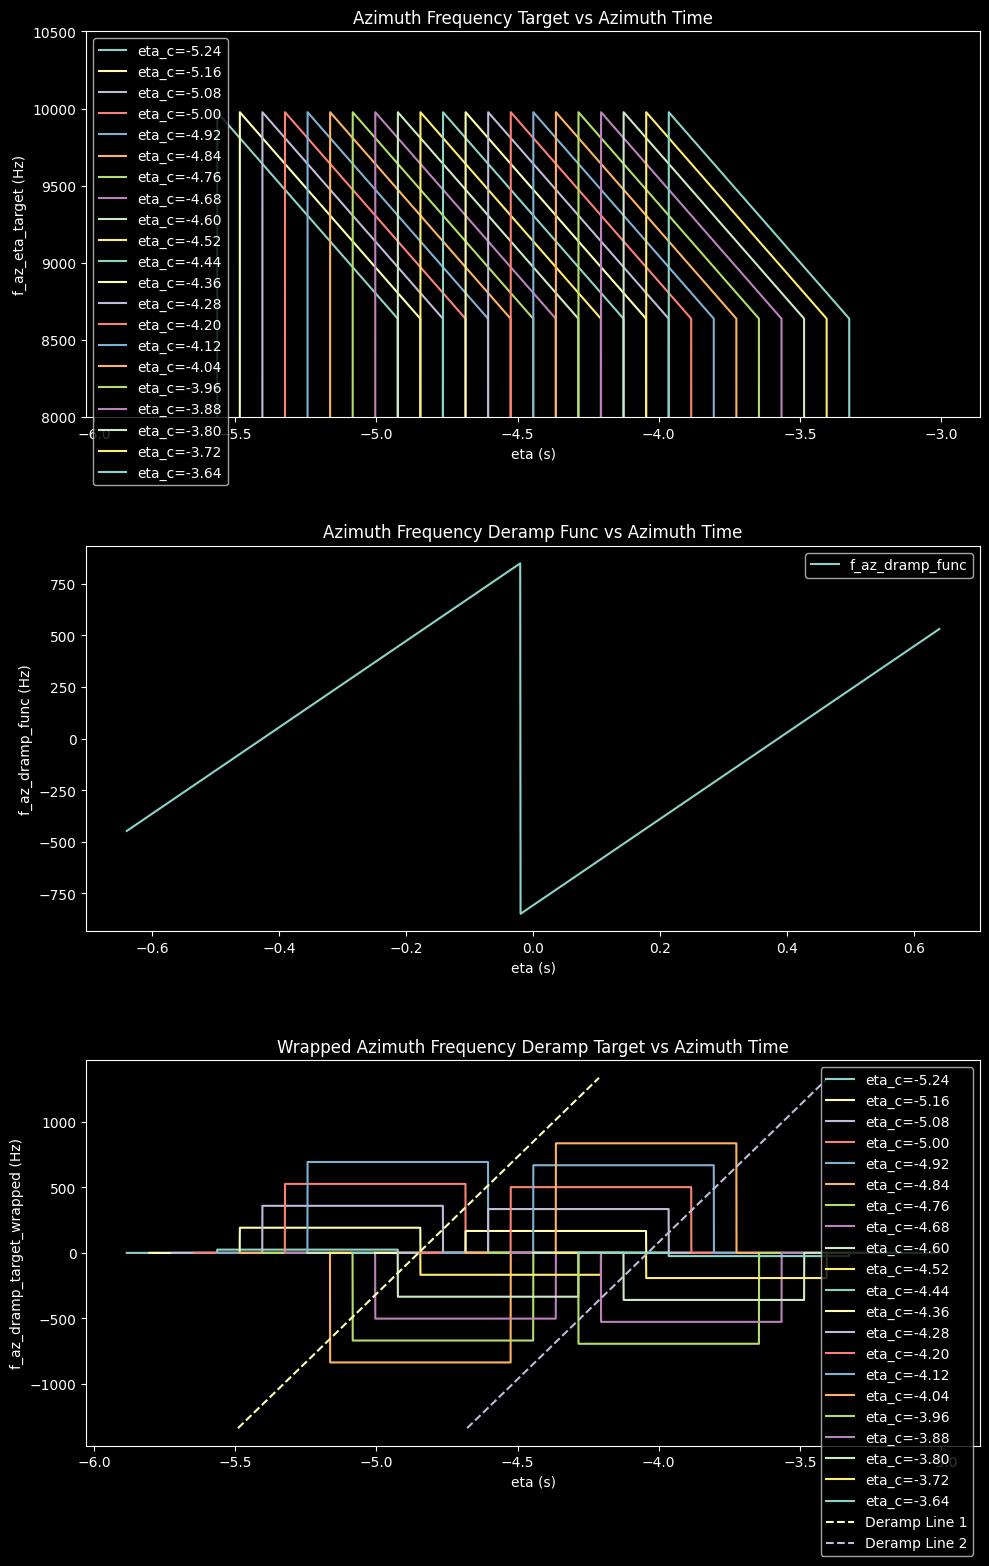

In [69]:
eta_c_list = np.linspace(-0.8,0.8,21) + eta_c
# eta_c_list = [eta_c]
# print('eta_c_list:', eta_c_list)
eta_array_extended = np.linspace(-Ta, Ta - 1/Fa,N_az)
f_az_eta_target = -Ka*(eta_array_extended+eta_c)*(np.abs(eta_array_extended)<=Ta/2)

plt.figure(figsize=(10, 16))
plt.subplot(3,1,1)
eta_c_val = eta_c_list[0]
for eta_c_val in eta_c_list:
    plt.plot(eta_array_extended+eta_c_val, f_az_eta_target, label=f'eta_c={eta_c_val:.2f}')
plt.xlabel('eta (s)')
plt.ylabel('f_az_eta_target (Hz)')
plt.ylim(8000, 10500)
plt.title('Azimuth Frequency Target vs Azimuth Time')
plt.legend()

plt.subplot(3,1,2)
f_az_dramp_func = Ka*(eta_array_extended+eta_c)
f_az_dramp_func_wrapped = f_az_dramp_func % (Fa)
f_az_dramp_func_wrapped[f_az_dramp_func_wrapped > Fa/2] -= Fa
plt.plot(eta_array_extended, f_az_dramp_func_wrapped
           , label='f_az_dramp_func')
plt.xlabel('eta (s)')
plt.ylabel('f_az_dramp_func (Hz)')
plt.title('Azimuth Frequency Deramp Func vs Azimuth Time')
# plt.grid()
plt.legend()

plt.subplot(3,1,3)
for eta_c_val in eta_c_list:
# eta_c_val = eta_c_list[0]
    f_az_dramp_func = Ka*(eta_array_extended+eta_c_val)
    f_az_dramp_func_wrapped = f_az_dramp_func % (Fa)
    f_az_dramp_func_wrapped[f_az_dramp_func_wrapped > Fa/2] -= Fa
    f_az_dramp_target = (f_az_eta_target+f_az_dramp_func_wrapped)*(np.abs(eta_array_extended)<=Ta/2)
    f_az_dramp_target_wrapped = f_az_dramp_target % (Fa)
    f_az_dramp_target_wrapped[f_az_dramp_target_wrapped > Fa/2] -= Fa
    plt.plot(eta_array_extended+eta_c_val, f_az_dramp_target_wrapped, label=f'eta_c={eta_c_val:.2f}')
t_prf = Fa/Ka
plt.plot(eta_array_extended-t_prf/2+eta_c, Ka*(eta_array_extended), '--', label='Deramp Line 1')
plt.plot(eta_array_extended+t_prf/2+eta_c, Ka*(eta_array_extended), '--', label='Deramp Line 2')
plt.xlabel('eta (s)')
plt.ylabel('f_az_dramp_target_wrapped (Hz)')
plt.title('Wrapped Azimuth Frequency Deramp Target vs Azimuth Time')
plt.legend()
plt.tight_layout()
plt.show()

FFT有效点

N_total: 1088


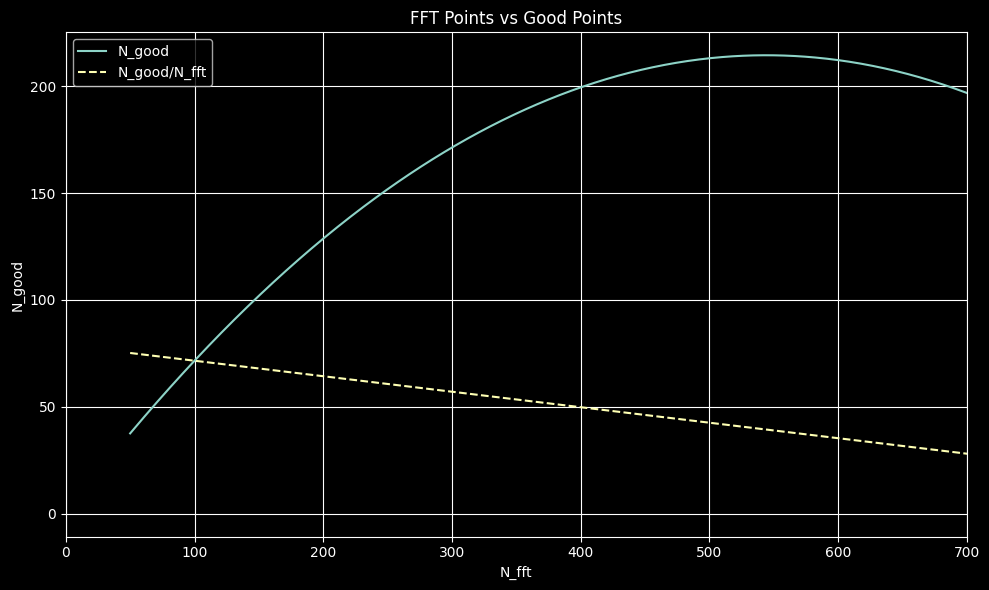

In [75]:
N_total = int(Ta*Fa)
print('N_total:', N_total)
start_n = 50
N_fft = np.linspace(start_n,N_total-1,N_total-start_n, dtype=int)
N_good = N_fft*(Ta - N_fft/Fa)*Ka/Fa
plt.figure(figsize=(10, 6))
plt.plot(N_fft, N_good, label='N_good')
plt.plot(N_fft, 100*N_good/(N_fft+1e-5),'--', label='N_good/N_fft')
plt.xlabel('N_fft')
plt.ylabel('N_good')
plt.title('FFT Points vs Good Points')
plt.xlim(0,700)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

FFT Delay

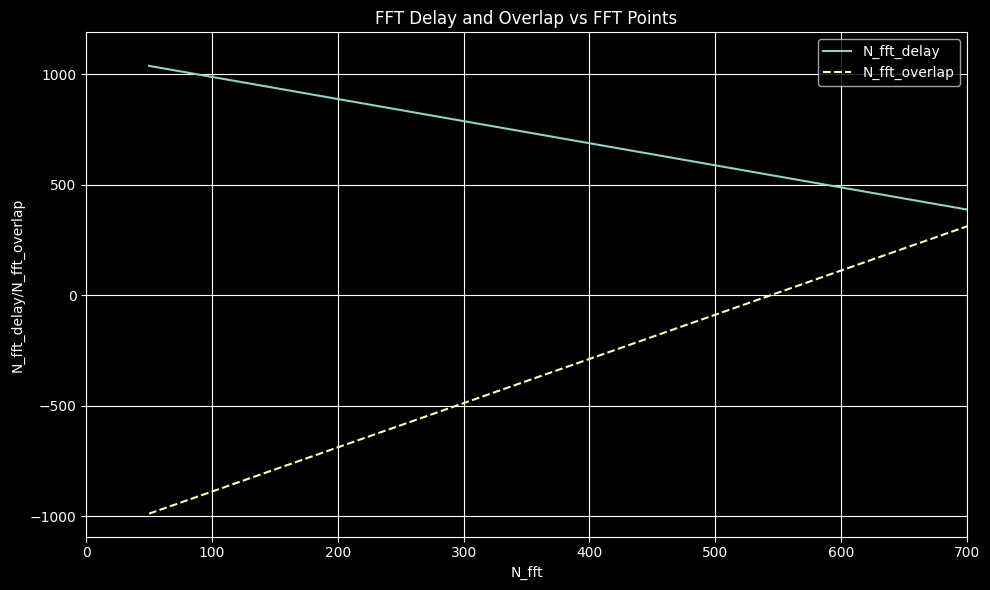

In [77]:
N_fft_delay = N_total - N_fft
N_fft_overlap = N_fft - N_fft_delay
plt.figure(figsize=(10, 6))
plt.plot(N_fft, N_fft_delay, label='N_fft_delay')
plt.plot(N_fft, N_fft_overlap,'--', label='N_fft_overlap')
plt.xlabel('N_fft')
plt.ylabel('N_fft_delay/N_fft_overlap')
plt.title('FFT Delay and Overlap vs FFT Points')
plt.xlim(0,700)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

处理效率

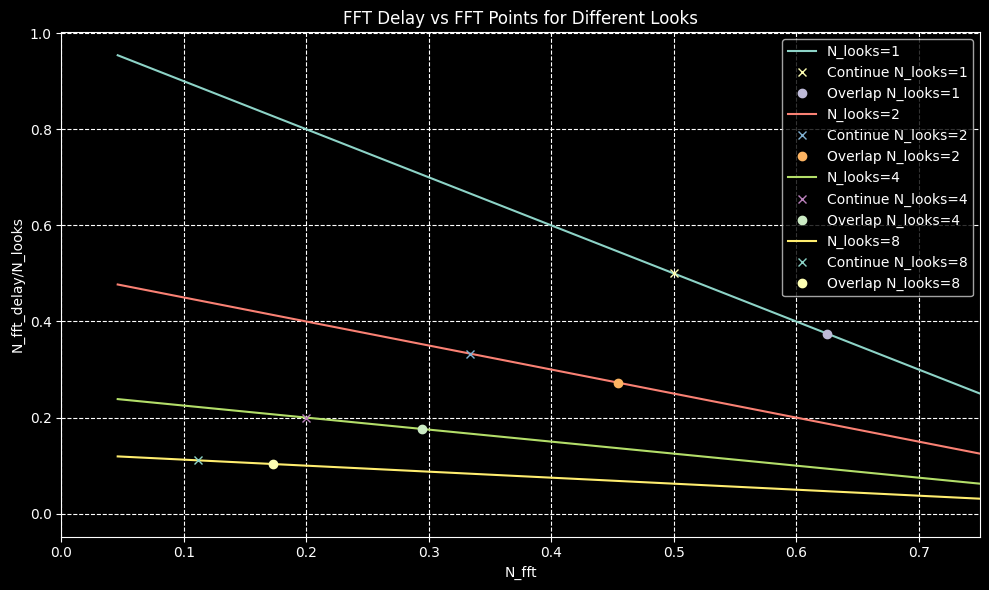

In [ ]:
N_looks = np.array([1,2,4,8],dtype=int)
N_fft_delay_looks = N_fft_delay[:, np.newaxis]/N_looks
plt.figure(figsize=(10, 6))
for i in range(len(N_looks)):
    plt.plot(N_fft/N_total, N_fft_delay_looks[:, i]/N_total, label=f'N_looks={N_looks[i]}')
    N_fft_continue = N_total/(1+N_looks[i])
    N_fft_delay_continue = (N_total - N_fft_continue)/N_looks[i]
    overlap = 0.4
    N_fft_overlap = N_total/(1+(1-overlap)*N_looks[i])
    N_fft_delay_overlap = (N_total - N_fft_overlap)/N_looks[i]
    plt.plot(N_fft_continue/N_total, N_fft_delay_continue/N_total, 'x', label=f'Continue N_looks={N_looks[i]}')
    plt.plot(N_fft_overlap/N_total, N_fft_delay_overlap/N_total, 'o', label=f'Overlap N_looks={N_looks[i]}')
plt.xlabel('N_fft/Ta')
plt.ylabel('N_fft_delay/N_looks')
plt.title('FFT Delay vs FFT Points for Different Looks')
plt.legend()
plt.xlim(0,0.75)
plt.grid(linestyle='--')
plt.tight_layout()



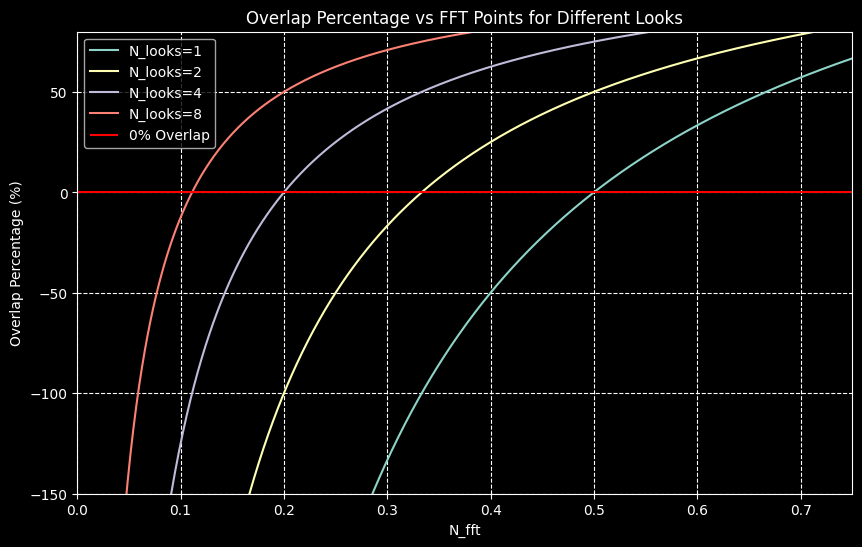

In [ ]:
plt.figure(figsize=(10, 6))
overlap_looks = N_fft[:,np.newaxis] - N_fft_delay_looks

for i in range(len(N_looks)):
    plt.plot(N_fft/N_total, 100*overlap_looks[:, i]/N_fft, label=f'N_looks={N_looks[i]}')
plt.hlines(0, 0, 0.75, colors='r', linestyles='-', label='0% Overlap')
plt.xlabel('N_fft/Ta')
plt.ylabel('Overlap Percentage (%)')
plt.title('Overlap Percentage vs FFT Points for Different Looks')
plt.legend()
plt.ylim(-150,80)
plt.xlim(0,0.75)
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()




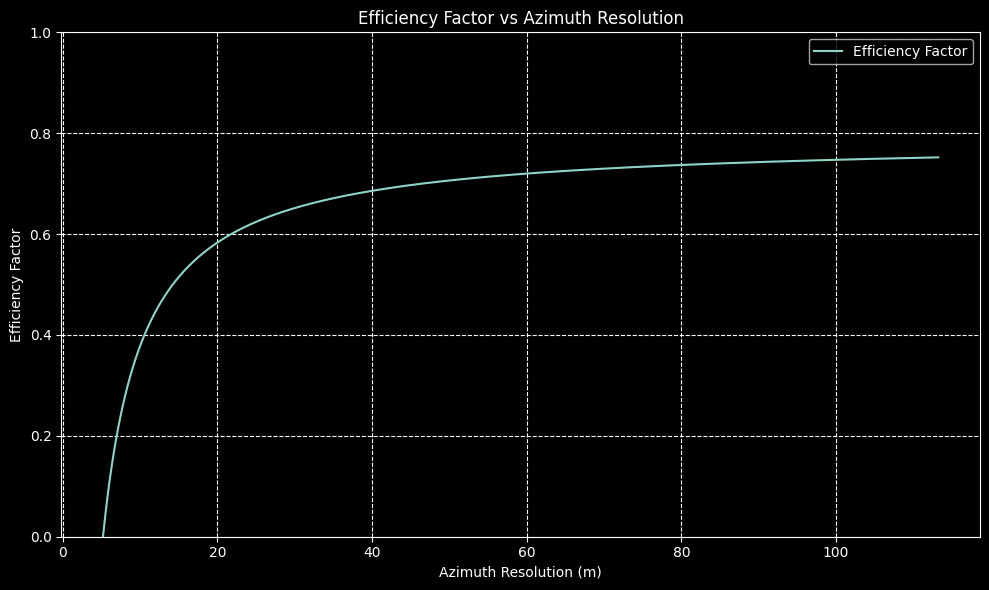

In [98]:
# azimuth resolution
azimuth_resolution = (0.886*Fa*1.18/N_fft/Ka)*(Vg*np.cos(theta_rc))
Efficiency_factor = N_good/N_fft
plt.figure(figsize=(10, 6))
plt.plot(azimuth_resolution, Efficiency_factor, label='Efficiency Factor')
plt.xlabel('Azimuth Resolution (m)')
plt.ylabel('Efficiency Factor')
plt.title('Efficiency Factor vs Azimuth Resolution')
plt.grid(linestyle='--')
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()


N_fft_s: [[1.63776493e+00 3.27552987e+00 6.55105973e+00 1.31021195e+01]
 [1.63934426e+00 3.27868852e+00 6.55737705e+00 1.31147541e+01]
 [1.64092664e+00 3.28185328e+00 6.56370656e+00 1.31274131e+01]
 ...
 [5.66666667e+02 1.13333333e+03 2.26666667e+03 4.53333333e+03]
 [8.50000000e+02 1.70000000e+03 3.40000000e+03 6.80000000e+03]
 [1.70000000e+03 3.40000000e+03 6.80000000e+03 1.36000000e+04]]


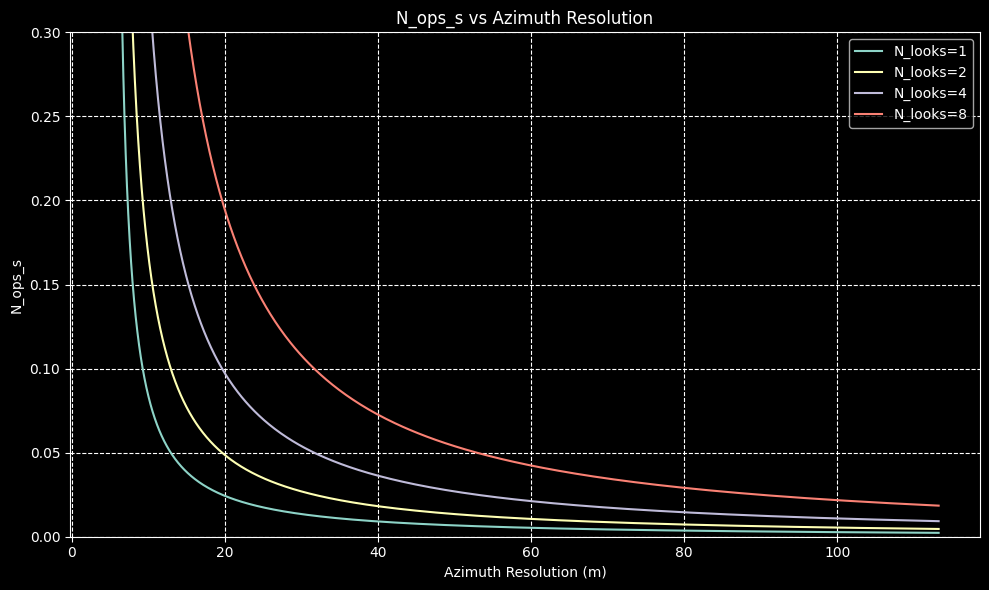

In [ ]:
#RDA 计算效率估计：
#一次FFT：从二维时域到距离多普勒域
#一次IFFT：从距离多普勒域到二维时域
#一次FFT处理整个二位矩阵(或某一列)，统计每秒FFT次数
#IFFT多视处理：将方位频率划分为多个子视分别进行IFFT，最后求和平均
#本质上RDA算法运算量应该与SPECAN类似？
N_fft_s = N_looks * (N_fft[:, np.newaxis]*Ka/Fa/N_good[:, np.newaxis])
print('N_fft_s:', N_fft_s)
N_ops_s = 5*N_fft[:, np.newaxis]*np.log2(N_fft[:, np.newaxis])*N_fft_s
plt.figure(figsize=(10, 6))
for i in range(len(N_looks)):
    plt.plot(azimuth_resolution, N_ops_s[:, i]*1e-6, label=f'N_looks={N_looks[i]}')
plt.xlabel('Azimuth Resolution (m)')
plt.ylabel('N_ops_s')
plt.title('N_ops_s vs Azimuth Resolution')
plt.grid(linestyle='--')
plt.ylim(0,0.30)
plt.legend()
plt.tight_layout()
plt.show()